## Random Forest를 이용한 행동 예측

In [3]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 파일들은 공백으로 분리. read_csv에서 공백 문자를 sep로 할당.
    feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+',
                                  header=None, names=['column_index', 'column_name'])
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩. 컬럼명은 feature_name
    X_train = pd.read_csv('./data/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./data/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼명은 action
    y_train = pd.read_csv('./data/human_activity/train/y_train.txt', sep='\s+', header=None,
                           names=['action'])
    y_test = pd.read_csv('./data/human_activity/test/y_test.txt', sep='\s+', header=None,
                           names=['action'])
    
    # 로드된 학습, 테으스 df를 모두 반환
    return X_train, X_test, y_train, y_test

C:\ProgramData\Anaconda3\envs\python_edu\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('rf accuracy: {0:.4f}'.format(accuracy))

rf accuracy: 0.9108


In [6]:
# GridSearchCV: 여러가지 파라메터 적용해서 RF 실행(가장 정확도 높았던 파라메터, 가장 수행 시간 적었던 파라메터)
# depth: decision tree의 층위
#        (root Node로부터 몇 n마디를 거치느냐: n depth. "root - parent - child node" 구성일 시 depth=2)
# min_samples_leaf: 최소 가지수
# min_samples_split: (1/8씩 가지면 안되냐, 1/16씩 가지면 안되냐, 1/32...)
# cv=2 조합 당 2번 시행해서 평균 냄. cv=10 조합 당 10번 시행 후 평균.

In [8]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'n_estimators': 100, 'min_samples_split': 8, 'max_depth': 10, 'min_samples_leaf': 8}
최고 예측 정확도: 0.9166


In [12]:
# 최적 파라미터 말고 내 맘대로 넣어보겠다 -> 정확도 떨어지거나 속도가 훨씬 오래 걸리게 된다
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=6, min_samples_leaf=8,
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9006


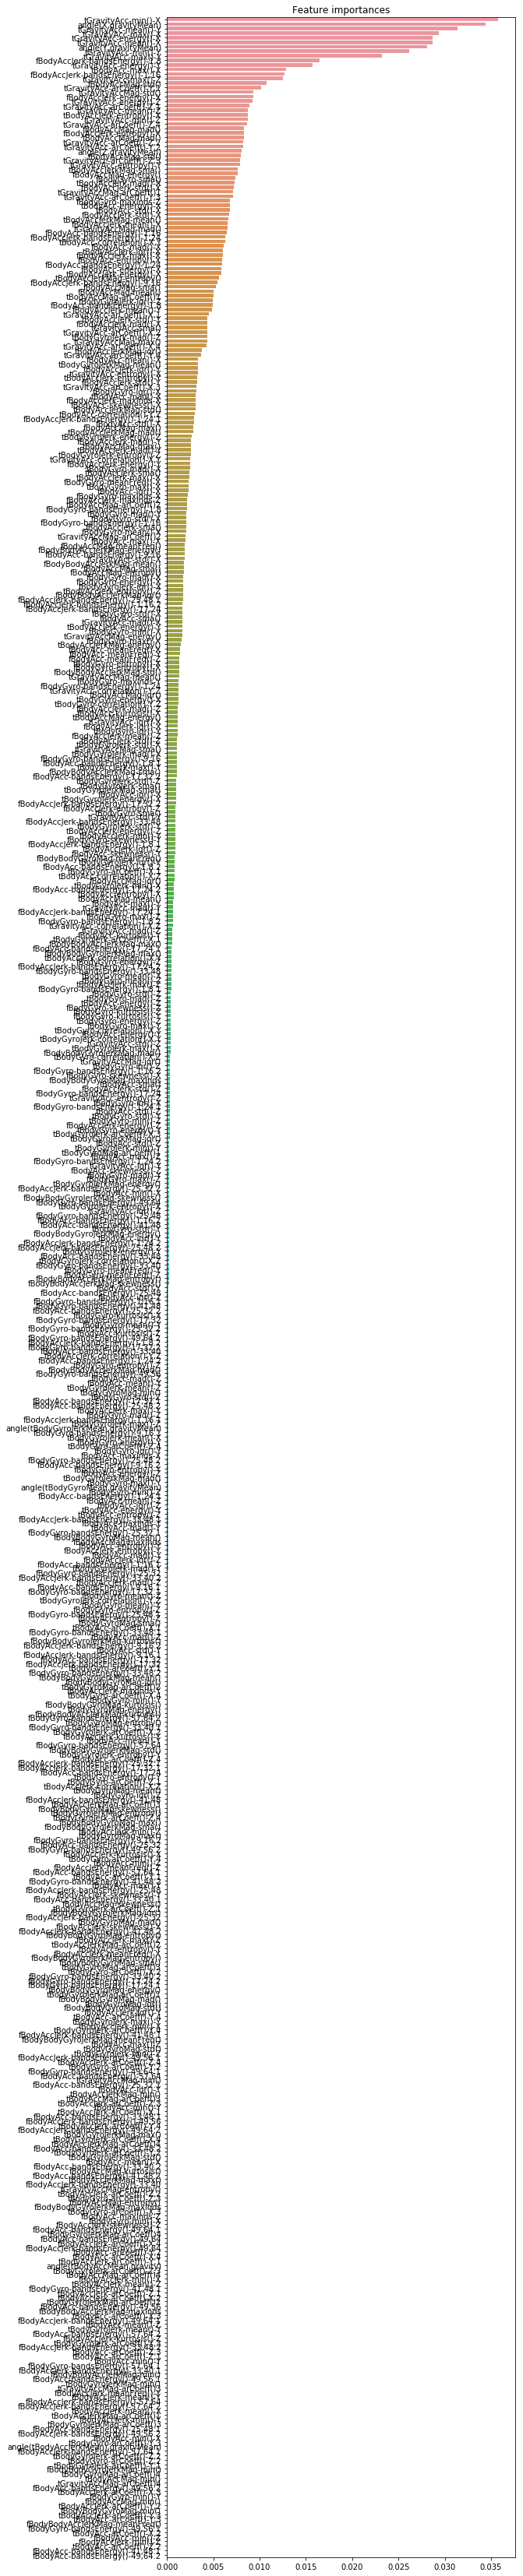

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8, 60))
plt.title('Feature importances')
sns.barplot(x=ftr, y=ftr.index)
plt.show()

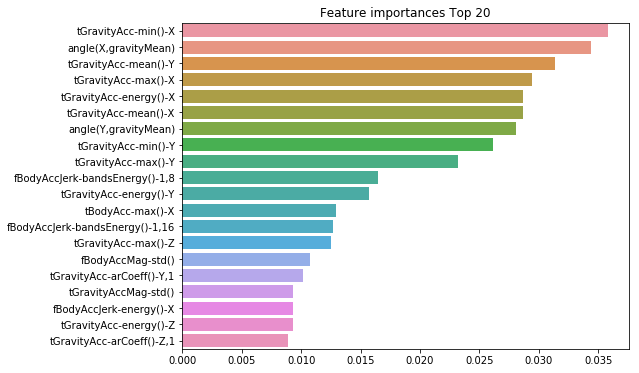

In [16]:
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()